In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
DS_PATH = "1.xlsx"
DPI = 200
MOST_CORRELATED_COUNT = 5
TARGET = "Vs"
CORRELATION_PATH = "correlation.png"
CORRELATION_TITLE = "The heatmap plot of variable correlations"
FULL_SCATTERPLOT_PATH = "scatterplot.png"
FULL_SCATTERPLOT_TITLE = "The scatter plot of dataset"
MOST_CORRELATED_PATH = "most_correlated.png"
MOST_CORRELATED_TITLE = "Scatter plot of {} and most correlated variables"

In [3]:
with open(DS_PATH, "rb") as afile:
    df = pd.read_excel(afile)

In [104]:
df.describe().drop("count").round(2)

d    CAL      C     DT    PE    RH      RT     SG    NP    DT.1  \
mean  2720.19   8.48   7.48  63.97  5.35  2.55   16.49  18.05  0.10  121.42   
std     46.35   0.29   6.68   5.88  0.43  0.08   19.36  10.89  0.04   12.22   
min   2640.03   8.30   0.00  50.21  4.31  2.32    0.91   5.26  0.01   99.30   
25%   2680.11   8.38   3.46  59.53  5.16  2.49    3.94   9.36  0.07  112.58   
50%   2720.19   8.41   5.74  63.11  5.33  2.56    9.37  15.07  0.11  119.24   
75%   2760.27   8.46   9.40  68.90  5.48  2.62   21.86  24.03  0.13  129.09   
max   2800.35  10.95  59.64  84.30  7.90  2.72  155.54  77.93  0.23  180.15   

        PH     W  CALC    VS     p    Vs  
mean  0.10  0.57  0.89  0.01  4.80  2.53  
std   0.04  0.31  0.05  0.05  0.43  0.24  
min   0.00  0.08  0.53  0.00  3.62  1.69  
25%   0.07  0.26  0.86  0.00  4.42  2.36  
50%   0.09  0.55  0.90  0.00  4.83  2.56  
75%   0.13  0.87  0.92  0.00  5.12  2.71  
max   0.20  1.00  0.99  0.46  6.07  3.07

In [5]:
correlations = df.corr()

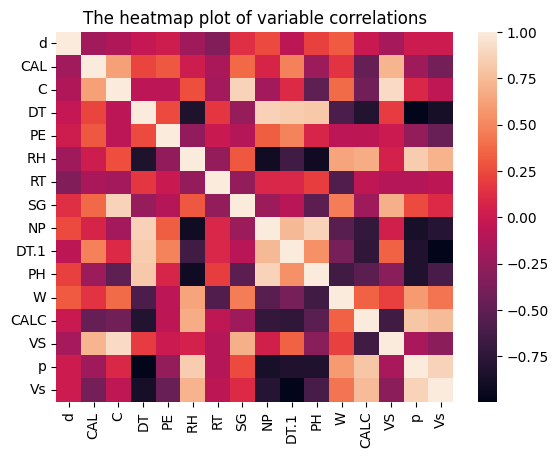

In [5]:
# plot the correlations
sns.heatmap(correlations).set(title=CORRELATION_TITLE)
plt.savefig(CORRELATION_PATH, dpi=DPI)

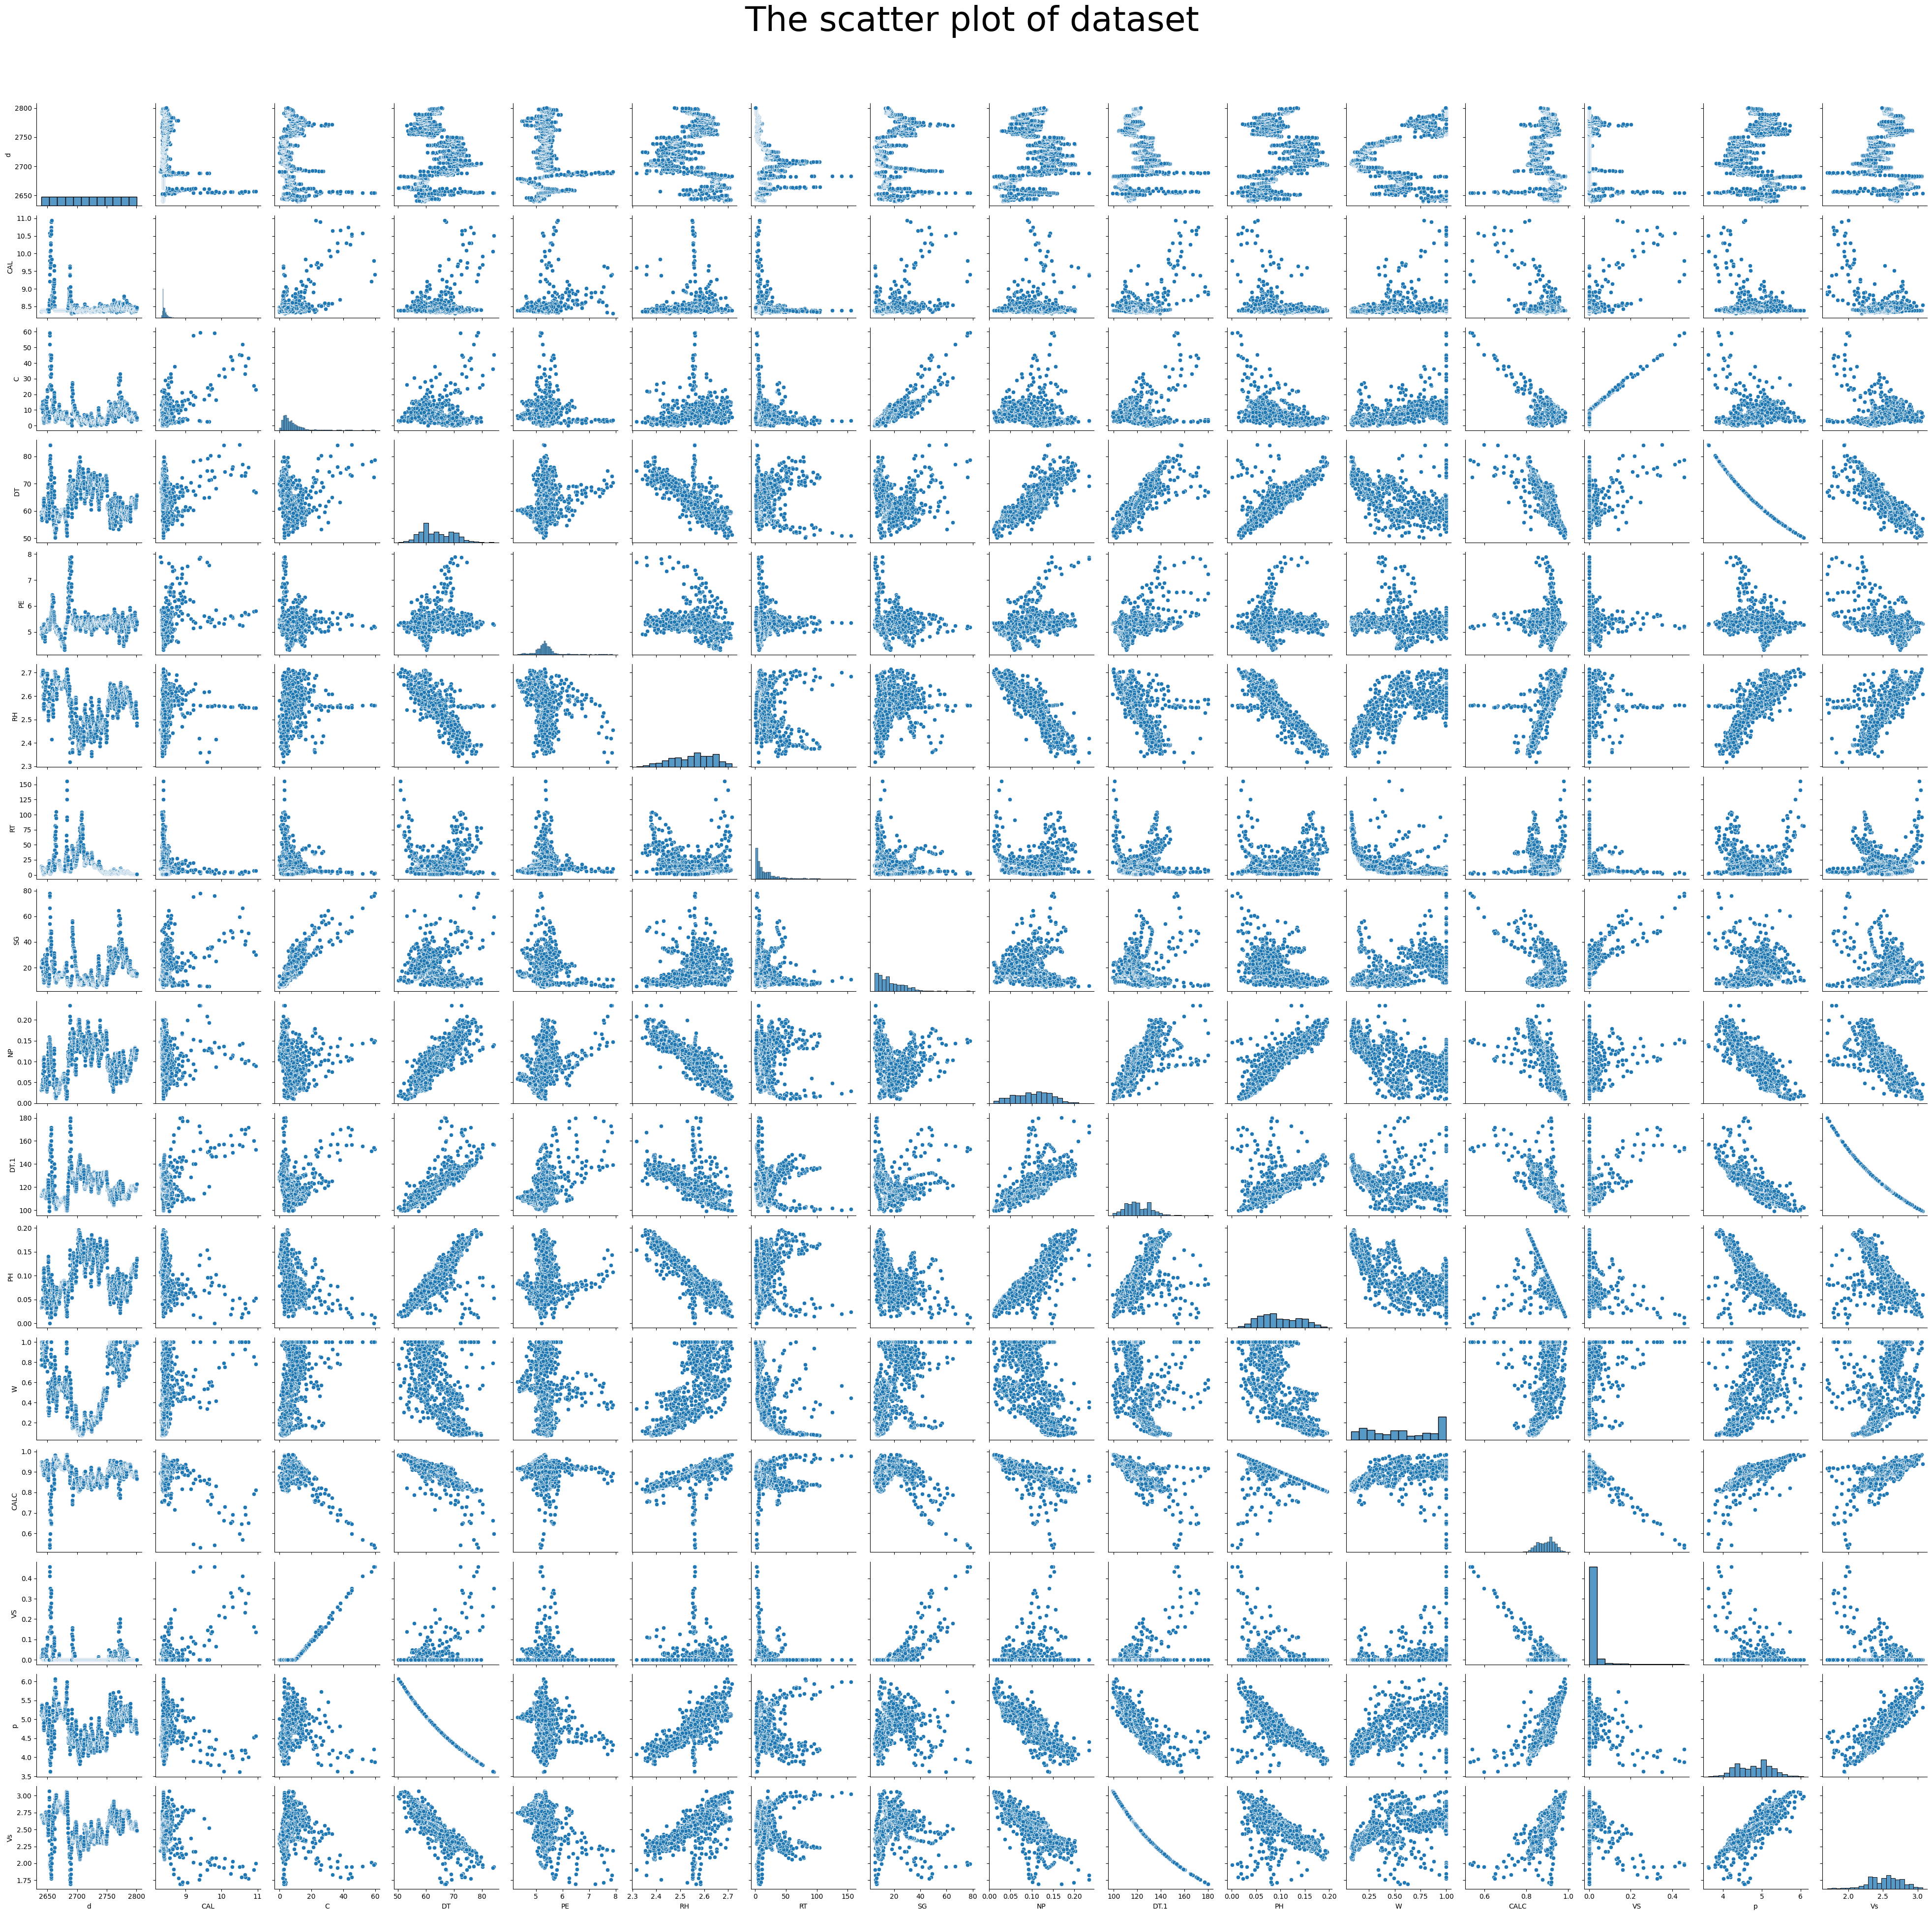

In [6]:
# scatterplot
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.fig.subplots_adjust(top=.93)
g.fig.suptitle(FULL_SCATTERPLOT_TITLE, size=50)
plt.savefig(FULL_SCATTERPLOT_PATH, dpi=DPI)

In [48]:
most_correlated_with_target = correlations[TARGET].drop(TARGET).abs().sort_values().iloc[-MOST_CORRELATED_COUNT:].index

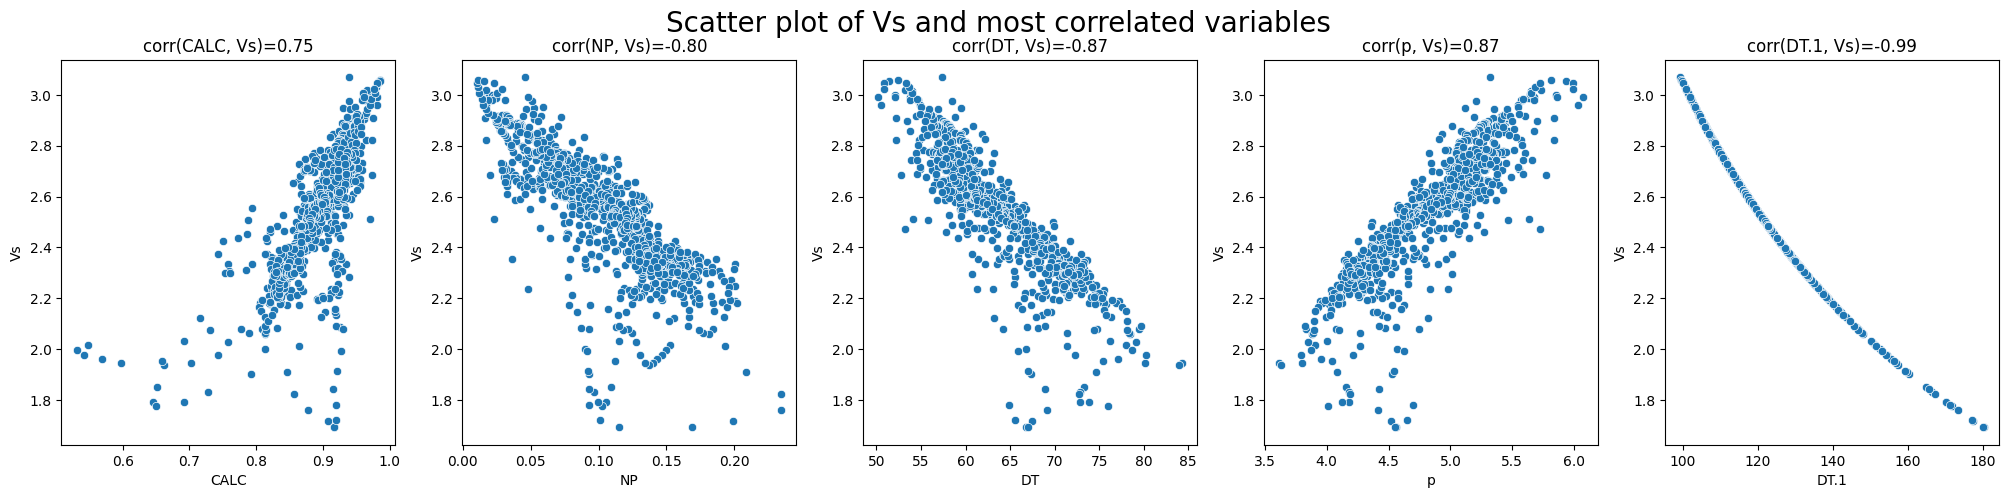

In [70]:
fig, axes = plt.subplots(1, MOST_CORRELATED_COUNT, figsize=(MOST_CORRELATED_COUNT*5, 5))
for ax, var in zip(axes, most_correlated_with_target):
    sns.scatterplot(x=df[var], y=df[TARGET], ax=ax)
    ax.set_title(f"corr({var}, {TARGET})={correlations[var][TARGET]:.2f}")
fig.suptitle(MOST_CORRELATED_TITLE.format(TARGET), fontsize=20)
plt.savefig(FULL_SCATTERPLOT_PATH, dpi=DPI)